# Maximum Pooling

Learn more about feature extraction with maximum pooling.

## Condense with Maximum Pooling

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), # activation is None
    layers.MaxPool2D(pool_size=2),
    # More layers follow
])

1. Import Library Penting:

    * from tensorflow import keras: Mengimpor library Keras dari TensorFlow.
    * from tensorflow.keras import layers: Mengimpor modul layers dari Keras, yang menyediakan berbagai jenis layer untuk membangun model.

2. Membangun Model Sequential:

    * model = keras.Sequential(): Menginisialisasi model dengan menggunakan kelas Sequential dari Keras. Kelas ini cocok untuk membangun model dengan susunan layer yang berurutan.

3. Menambahkan Layer Konvolusi 2D:

    * layers.Conv2D(filters=64, kernel_size=3): Menambahkan layer konvolusi 2D dengan properti:
        * filters=64: Menentukan jumlah filter pada layer konvolusi ini, yang mengontrol jumlah peta fitur yang dihasilkan.
        * kernel_size=3: Menentukan ukuran kernel (jendela) yang digunakan untuk operasi konvolusi, dalam hal ini 3x3.
        * Catatan: Fungsi aktivasi tidak ditentukan secara eksplisit di sini. Aktivasi default untuk layer konvolusi adalah relu.

4. Menambahkan Layer Max Pooling 2D:

    * layers.MaxPool2D(pool_size=2): Menambahkan layer pooling 2D dengan ukuran pooling 2x2.
        * Operasi pooling digunakan untuk mengurangi dimensi spasial (tinggi dan lebar) dari feature map yang dihasilkan oleh layer konvolusi sebelumnya.
        * Max pooling mengambil nilai maksimum dalam area pooling yang ditentukan (2x2 dalam kasus ini).

## Example - Apply Maximum Pooling

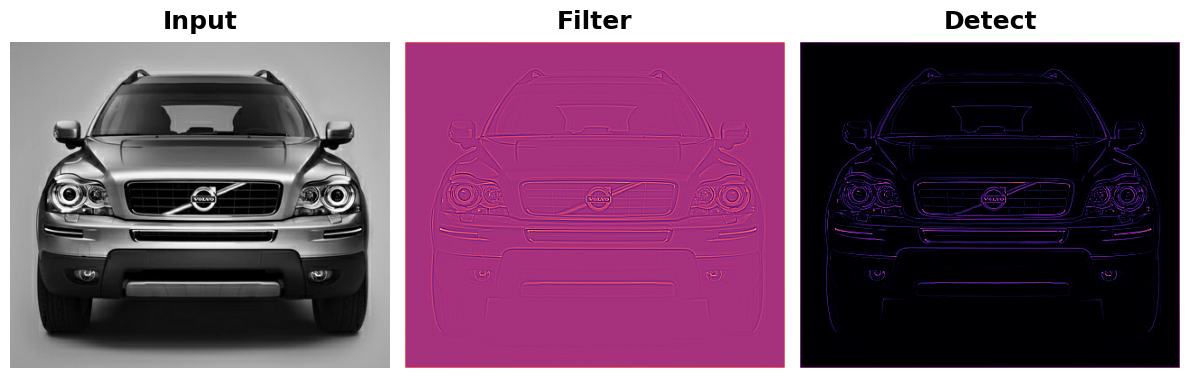

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Read image
image_path = './car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

# Define kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

# Filter step
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in the next lesson!
    strides=1,
    padding='SAME'
)

# Detect step
image_detect = tf.nn.relu(image_filter)

# Show what we have so far
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show();

1. Impor Library dan Persiapan Data:

    * Mengimpor library yang diperlukan (TensorFlow, Matplotlib, dan menghilangkan peringatan untuk output yang lebih bersih).
    * Membaca dan mendekode gambar dari path yang ditentukan.

2. Definisi Kernel:

    * Mendefinisikan kernel sebagai tensor konstan dengan nilai tertentu.

3. Reformasi untuk Kompatibilitas Batch:

    * Mengubah data gambar dan kernel menjadi tipe tf.float32 dan menambahkan dimensi batch untuk menangani beberapa gambar.

4. Pemfilteran Konvolusi:

    * Melakukan operasi konvolusi menggunakan tf.nn.conv2d, menghasilkan feature map.

5. Aktivasi ReLU:

    * Menerapkan fungsi aktivasi ReLU pada feature map, memperkenalkan non-linearitas.

6. Visualisasi:

    * Membuat figure dengan tiga subplot:
        * Subplot 1: Menampilkan gambar input asli dalam skala abu-abu.
        * Subplot 2: Menampilkan feature map yang dihasilkan oleh operasi konvolusi.
        * Subplot 3: Menampilkan feature map setelah menerapkan fungsi aktivasi ReLU.
    * Visualisasi ini memungkinkan Anda untuk membandingkan gambar input, feature map yang difilter, dan feature map yang telah diaktifkan.

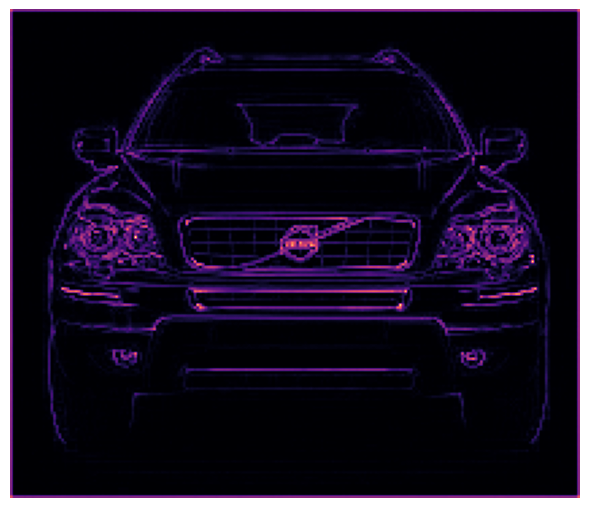

In [2]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

1. Fungsi tf.nn.pool:

    * image_condense = tf.nn.pool(...): Fungsi ini melakukan operasi pooling pada tensor image_detect (feature map yang dihasilkan dari langkah "Detect" sebelumnya).
        * input: Tensor yang akan dioperasikan pooling (feature map).
        * window_shape: Ukuran jendela pooling (dalam hal ini 2x2).
        * pooling_type: Jenis operasi pooling yang digunakan ('MAX' untuk maksimum).
        * Argumen yang akan dibahas di lesson berikutnya:
            * strides: Langkah pergeseran jendela pooling.
            * padding: Jenis padding yang digunakan untuk menangani tepi feature map.

2. Pengurangan Dimensi Spasial:

    * Operasi pooling bertujuan untuk mengurangi dimensi spasial (tinggi dan lebar) dari feature map.
        * Dalam kasus ini, pooling 2x2 dengan langkah 2x2 akan mengurangi dimensi spasial feature map menjadi setengahnya.

3. Maksimalisasi:

    * Karena pooling_type diatur ke 'MAX', operasi pooling akan mengambil nilai maksimum dalam setiap area pooling 2x2.
        * Ini menghasilkan feature map yang lebih kecil dengan nilai yang lebih menonjol, berfokus pada fitur yang paling aktif dalam area tersebut.

4. Visualisasi:

    * Kode selanjutnya menampilkan feature map setelah operasi pooling:
        * plt.figure(figsize=(6, 6)): Membuat figure untuk visualisasi.
        * plt.imshow(tf.squeeze(image_condense)): Menampilkan feature map yang dipooling sebagai gambar.
        * plt.axis('off'): Menyembunyikan label dan tick sumbu.
        * plt.show(): Menampilkan plot yang dihasilkan.